Various MLP architectures on MNIST

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers import Dense, Activation
from keras.initializers import he_normal
import seaborn as sns

Using TensorFlow backend.


In [0]:
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
#reshaping the (28*28) vector into single dimensional vector of 1 * 784 
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [6]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# An example data point
print(X_train[5])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  13  25 100 122   7   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  33 151 208 252 252 252 146   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211 252 232
  40   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  15
 152 239 252 252 252 216  31  37 252 252  60   0   

In [0]:
# Above matrix contains each cell is having a value between 0-255.
#Normalization of the data.
# X => (X - Xmin)/(Xmax-Xmin) = X/255(max=255,min=0)
X_train = X_train/255
X_test = X_test/255

In [9]:
# example data point after normlizing
print(X_train[5])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
#variables related to model
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 128 
nb_epoch = 20

**MLP WITH TWO HIDDEN LAYERS** (784-392-196-10)





 Without dropout and batchnormalization

In [0]:
model_2_without_dropout_bn = Sequential()
model_2_without_dropout_bn.add(Dense(392, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal()))
model_2_without_dropout_bn.add(Dense(196, activation='relu', kernel_initializer=he_normal()) )
model_2_without_dropout_bn.add(Dense(output_dim, activation='softmax'))

print(model_2_without_dropout_bn.summary())

model_2_without_dropout_bn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history21 = model_2_without_dropout_bn.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_144 (Dense)            (None, 392)               307720    
_________________________________________________________________
dense_145 (Dense)            (None, 196)               77028     
_________________________________________________________________
dense_146 (Dense)            (None, 10)                1970      
Total params: 386,718
Trainable params: 386,718
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.2415 - acc: 0.9306 - val_loss: 0.1179 - val_acc: 0.9635
Epoch 2/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.0890 - acc: 0.9735 - val_loss: 0.0895 - val_acc: 0.9714
Epoch 3/20
60000/60000 [==============================] - 3s 56us/ste

Test score: 0.11896648174383613
Test accuracy: 0.9767


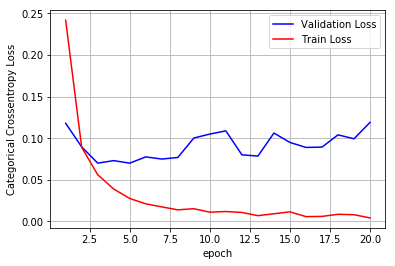

In [0]:
score = model_2_without_dropout_bn.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history21.history['val_loss']
ty = history21.history['loss']
plt_dynamic(x, vy, ty, ax)

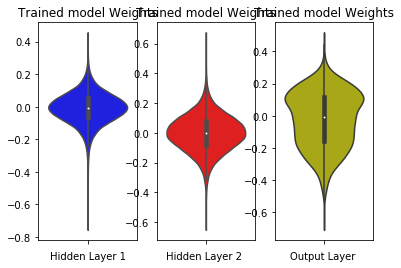

In [0]:
w_after = model_2_without_dropout_bn.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

with batch normalization

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model_2_with_bn = Sequential()
model_2_with_bn.add(Dense(392, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal()))
model_2_with_bn.add(BatchNormalization())

model_2_with_bn.add(Dense(196, activation='relu', kernel_initializer=he_normal()) )
model_2_with_bn.add(BatchNormalization())

model_2_with_bn.add(Dense(output_dim, activation='softmax'))

print(model_2_with_bn.summary())

model_2_with_bn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history22 = model_2_with_bn.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_147 (Dense)            (None, 392)               307720    
_________________________________________________________________
batch_normalization_53 (Batc (None, 392)               1568      
_________________________________________________________________
dense_148 (Dense)            (None, 196)               77028     
_________________________________________________________________
batch_normalization_54 (Batc (None, 196)               784       
_________________________________________________________________
dense_149 (Dense)            (None, 10)                1970      
Total params: 389,070
Trainable params: 387,894
Non-trainable params: 1,176
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 198us/step - lo

Test score: 0.08530029593235777
Test accuracy: 0.9815


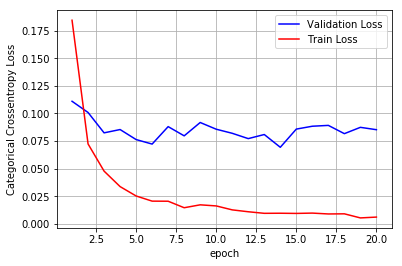

In [0]:
score = model_2_with_bn.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history22.history['val_loss']
ty = history22.history['loss']
plt_dynamic(x, vy, ty, ax)

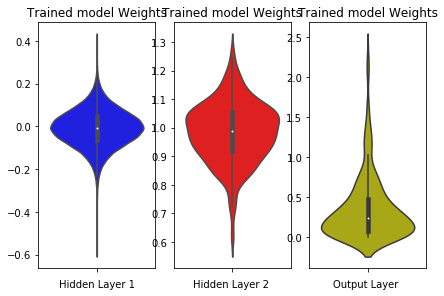

In [0]:
w_after = model_2_with_bn.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()

plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.tight_layout()
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

with dropout(dropout rate 0.5)

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model_2_with_dropout = Sequential()
model_2_with_dropout.add(Dense(392, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal()))
model_2_with_dropout.add(Dropout(0.5))

model_2_with_dropout.add(Dense(196, activation='relu', kernel_initializer=he_normal()) )
model_2_with_dropout.add(Dropout(0.5))

model_2_with_dropout.add(Dense(output_dim, activation='softmax'))

print(model_2_with_dropout.summary())

model_2_with_dropout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history23 = model_2_with_dropout.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_150 (Dense)            (None, 392)               307720    
_________________________________________________________________
dropout_53 (Dropout)         (None, 392)               0         
_________________________________________________________________
dense_151 (Dense)            (None, 196)               77028     
_________________________________________________________________
dropout_54 (Dropout)         (None, 196)               0         
_________________________________________________________________
dense_152 (Dense)            (None, 10)                1970      
Total params: 386,718
Trainable params: 386,718
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 167us/step - loss: 

Test score: 0.06349568391248431
Test accuracy: 0.9822


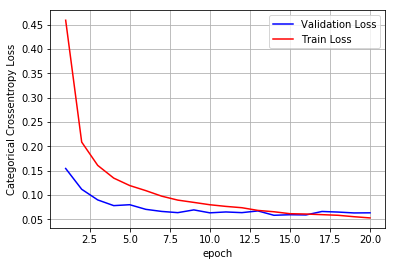

In [0]:
score = model_2_with_dropout.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history23.history['val_loss']
ty = history23.history['loss']
plt_dynamic(x, vy, ty, ax)

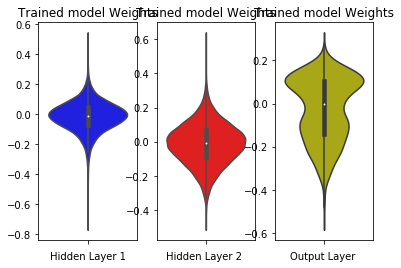

In [0]:
w_after = model_2_with_dropout.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

with dropout(dropout rate 0.6)

In [12]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model_2_with_dropout2 = Sequential()
model_2_with_dropout2.add(Dense(392, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal()))
model_2_with_dropout2.add(Dropout(0.6))

model_2_with_dropout2.add(Dense(196, activation='relu', kernel_initializer=he_normal()) )
model_2_with_dropout2.add(Dropout(0.6))

model_2_with_dropout2.add(Dense(output_dim, activation='softmax'))

print(model_2_with_dropout2.summary())

model_2_with_dropout2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history232 = model_2_with_dropout2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

W0615 04:26:23.348604 139926098749312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0615 04:26:23.387606 139926098749312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0615 04:26:23.393242 139926098749312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0615 04:26:23.409410 139926098749312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0615 04:26

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 392)               307720    
_________________________________________________________________
dropout_1 (Dropout)          (None, 392)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 196)               77028     
_________________________________________________________________
dropout_2 (Dropout)          (None, 196)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1970      
Total params: 386,718
Trainable params: 386,718
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 102us/step - loss: 0

Test score: 0.06655279130957933
Test accuracy: 0.9821


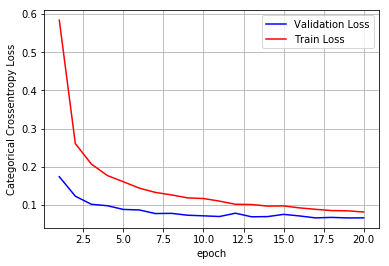

In [13]:
score = model_2_with_dropout2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history232.history['val_loss']
ty = history232.history['loss']
plt_dynamic(x, vy, ty, ax)

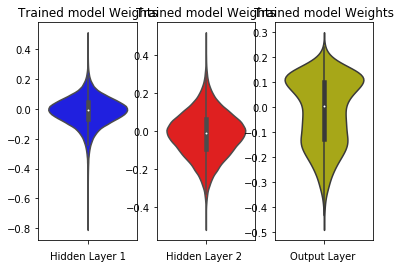

In [14]:
w_after = model_2_with_dropout2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

with dropout(dropout rate 0.4)

In [15]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model_2_with_dropout3 = Sequential()
model_2_with_dropout3.add(Dense(392, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal()))
model_2_with_dropout3.add(Dropout(0.4))

model_2_with_dropout3.add(Dense(196, activation='relu', kernel_initializer=he_normal()) )
model_2_with_dropout3.add(Dropout(0.4))

model_2_with_dropout3.add(Dense(output_dim, activation='softmax'))

print(model_2_with_dropout3.summary())

model_2_with_dropout3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history233 = model_2_with_dropout3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 392)               307720    
_________________________________________________________________
dropout_3 (Dropout)          (None, 392)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 196)               77028     
_________________________________________________________________
dropout_4 (Dropout)          (None, 196)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1970      
Total params: 386,718
Trainable params: 386,718
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 42us/step - loss: 0.

Test score: 0.06494450874994381
Test accuracy: 0.9826


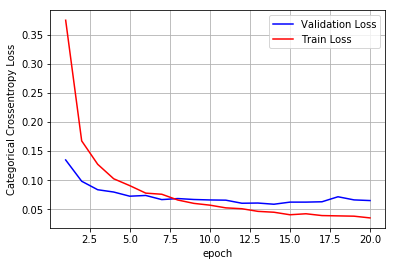

In [16]:
score = model_2_with_dropout3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history233.history['val_loss']
ty = history233.history['loss']
plt_dynamic(x, vy, ty, ax)

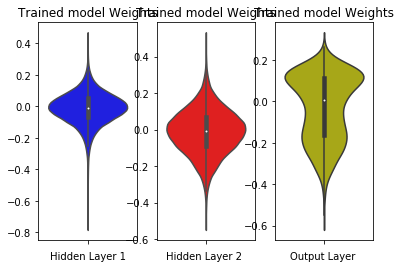

In [17]:
w_after = model_2_with_dropout3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

with batch normalization and dropout(dropout rate 0.5)

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model_2_with_dropout_bn = Sequential()
model_2_with_dropout_bn.add(Dense(392, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal()))
model_2_with_dropout_bn.add(BatchNormalization())
model_2_with_dropout_bn.add(Dropout(0.5))

model_2_with_dropout_bn.add(Dense(196, activation='relu', kernel_initializer=he_normal()) )
model_2_with_dropout_bn.add(BatchNormalization())
model_2_with_dropout_bn.add(Dropout(0.5))

model_2_with_dropout_bn.add(Dense(output_dim, activation='softmax'))

print(model_2_with_dropout_bn.summary())

model_2_with_dropout_bn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history24 = model_2_with_dropout_bn.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_153 (Dense)            (None, 392)               307720    
_________________________________________________________________
batch_normalization_55 (Batc (None, 392)               1568      
_________________________________________________________________
dropout_55 (Dropout)         (None, 392)               0         
_________________________________________________________________
dense_154 (Dense)            (None, 196)               77028     
_________________________________________________________________
batch_normalization_56 (Batc (None, 196)               784       
_________________________________________________________________
dropout_56 (Dropout)         (None, 196)               0         
_________________________________________________________________
dense_155 (Dense)            (None, 10)                1970      
Total para

Test score: 0.05845696316281101
Test accuracy: 0.9829


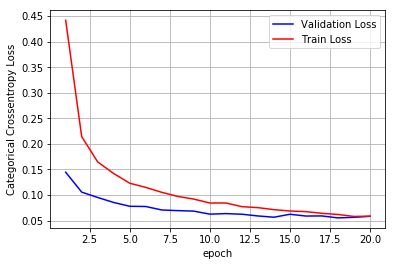

In [0]:
score = model_2_with_dropout_bn.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history24.history['val_loss']
ty = history24.history['loss']
plt_dynamic(x, vy, ty, ax)

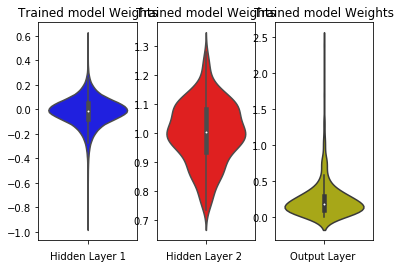

In [0]:
w_after = model_2_with_dropout_bn.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

MLP WITH THREE HIDDEN LAYERS 

without dropout and batchnormalization

In [0]:
model_3_without_dropout_bn = Sequential()
model_3_without_dropout_bn.add(Dense(588, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal()))
model_3_without_dropout_bn.add(Dense(392, activation='relu', kernel_initializer=he_normal()) )
model_3_without_dropout_bn.add(Dense(196, activation='relu', kernel_initializer=he_normal()) )
model_3_without_dropout_bn.add(Dense(output_dim, activation='softmax'))

print(model_3_without_dropout_bn.summary())

model_3_without_dropout_bn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history31 = model_3_without_dropout_bn.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_156 (Dense)            (None, 588)               461580    
_________________________________________________________________
dense_157 (Dense)            (None, 392)               230888    
_________________________________________________________________
dense_158 (Dense)            (None, 196)               77028     
_________________________________________________________________
dense_159 (Dense)            (None, 10)                1970      
Total params: 771,466
Trainable params: 771,466
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 175us/step - loss: 0.2110 - acc: 0.9374 - val_loss: 0.1058 - val_acc: 0.9679
Epoch 2/20
60000/60000 [==============================] - 4s 62us/step - l

Test score: 0.08832607992837381
Test accuracy: 0.9812


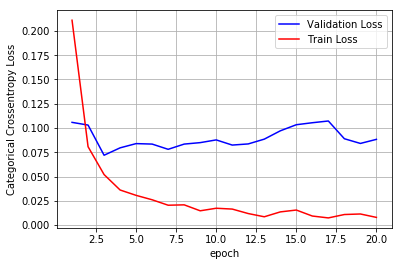

In [0]:
score = model_3_without_dropout_bn.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history31.history['val_loss']
ty = history31.history['loss']
plt_dynamic(x, vy, ty, ax)

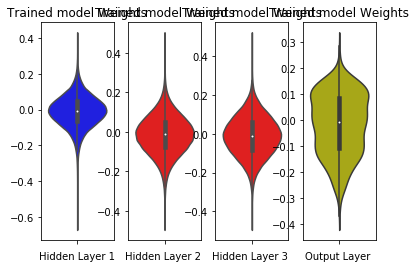

In [0]:
w_after = model_3_without_dropout_bn.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')


plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

with batch normalization

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model_3_with_bn = Sequential()
model_3_with_bn.add(Dense(588, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal()))
model_3_with_bn.add(BatchNormalization())


model_3_with_bn.add(Dense(392, activation='relu', kernel_initializer=he_normal()) )
model_3_with_bn.add(BatchNormalization())

model_3_with_bn.add(Dense(196, activation='relu', kernel_initializer=he_normal()) )
model_3_with_bn.add(BatchNormalization())

model_3_with_bn.add(Dense(output_dim, activation='softmax'))

print(model_3_with_bn.summary())

model_3_with_bn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history32 = model_3_with_bn.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_160 (Dense)            (None, 588)               461580    
_________________________________________________________________
batch_normalization_57 (Batc (None, 588)               2352      
_________________________________________________________________
dense_161 (Dense)            (None, 392)               230888    
_________________________________________________________________
batch_normalization_58 (Batc (None, 392)               1568      
_________________________________________________________________
dense_162 (Dense)            (None, 196)               77028     
_________________________________________________________________
batch_normalization_59 (Batc (None, 196)               784       
_________________________________________________________________
dense_163 (Dense)            (None, 10)                1970      
Total para

Test score: 0.07772337867305978
Test accuracy: 0.9813


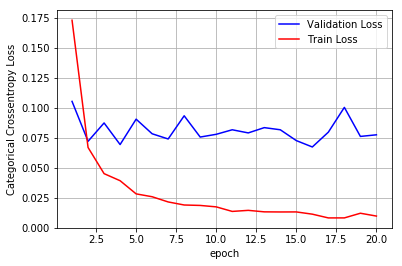

In [0]:
score = model_3_with_bn.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history32.history['val_loss']
ty = history32.history['loss']
plt_dynamic(x, vy, ty, ax)

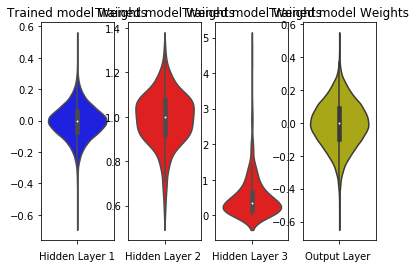

In [0]:
w_after = model_3_with_bn.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')


plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

with dropout(dropout rate 0.5)

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model_3_with_dropout = Sequential()
model_3_with_dropout.add(Dense(588, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal()))
model_3_with_dropout.add(Dropout(0.5))

model_3_with_dropout.add(Dense(392, activation='relu', kernel_initializer=he_normal()) )
model_3_with_dropout.add(Dropout(0.5))

model_3_with_dropout.add(Dense(196, activation='relu', kernel_initializer=he_normal()) )
model_3_with_dropout.add(Dropout(0.5))

model_3_with_dropout.add(Dense(output_dim, activation='softmax'))

print(model_3_with_dropout.summary())

model_3_with_dropout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history33 = model_3_with_dropout.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_164 (Dense)            (None, 588)               461580    
_________________________________________________________________
dropout_57 (Dropout)         (None, 588)               0         
_________________________________________________________________
dense_165 (Dense)            (None, 392)               230888    
_________________________________________________________________
dropout_58 (Dropout)         (None, 392)               0         
_________________________________________________________________
dense_166 (Dense)            (None, 196)               77028     
_________________________________________________________________
dropout_59 (Dropout)         (None, 196)               0         
_________________________________________________________________
dense_167 (Dense)            (None, 10)                1970      
Total para

Test score: 0.07113226388252697
Test accuracy: 0.9823


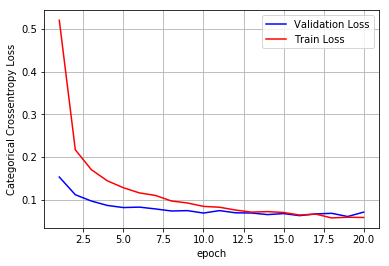

In [0]:
score = model_3_with_dropout.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history33.history['val_loss']
ty = history33.history['loss']
plt_dynamic(x, vy, ty, ax)

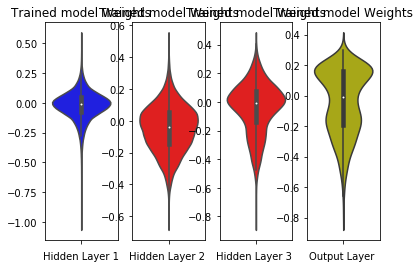

In [0]:
w_after = model_3_with_dropout.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')


plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

with dropout(dropout rate 0.6)

In [18]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model_3_with_dropout2 = Sequential()
model_3_with_dropout2.add(Dense(588, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal()))
model_3_with_dropout2.add(Dropout(0.6))

model_3_with_dropout2.add(Dense(392, activation='relu', kernel_initializer=he_normal()) )
model_3_with_dropout2.add(Dropout(0.6))

model_3_with_dropout2.add(Dense(196, activation='relu', kernel_initializer=he_normal()) )
model_3_with_dropout2.add(Dropout(0.6))

model_3_with_dropout2.add(Dense(output_dim, activation='softmax'))

print(model_3_with_dropout2.summary())

model_3_with_dropout2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history332 = model_3_with_dropout2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

W0615 04:39:43.795636 139926098749312 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0615 04:39:43.826929 139926098749312 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0615 04:39:43.856595 139926098749312 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 588)               461580    
_________________________________________________________________
dropout_5 (Dropout)          (None, 588)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 392)               230888    
_________________________________________________________________
dropout_6 (Dropout)          (None, 392)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 196)               77028     
_________________________________________________________________
dropout_7 (Dropout)          (None, 196)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1970      
Total para

Test score: 0.06886645217841979
Test accuracy: 0.9812


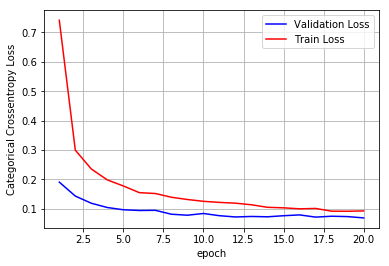

In [19]:
score = model_3_with_dropout2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history332.history['val_loss']
ty = history332.history['loss']
plt_dynamic(x, vy, ty, ax)

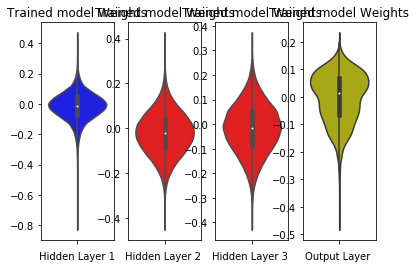

In [20]:
w_after = model_3_with_dropout2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')


plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

with dropout(dropout rate 0.4)

In [22]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model_3_with_dropout3 = Sequential()
model_3_with_dropout3.add(Dense(588, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal()))
model_3_with_dropout3.add(Dropout(0.4))

model_3_with_dropout3.add(Dense(392, activation='relu', kernel_initializer=he_normal()) )
model_3_with_dropout3.add(Dropout(0.4))

model_3_with_dropout3.add(Dense(196, activation='relu', kernel_initializer=he_normal()) )
model_3_with_dropout3.add(Dropout(0.4))

model_3_with_dropout3.add(Dense(output_dim, activation='softmax'))

print(model_3_with_dropout3.summary())

model_3_with_dropout3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history333 = model_3_with_dropout3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 588)               461580    
_________________________________________________________________
dropout_11 (Dropout)         (None, 588)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 392)               230888    
_________________________________________________________________
dropout_12 (Dropout)         (None, 392)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 196)               77028     
_________________________________________________________________
dropout_13 (Dropout)         (None, 196)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1970      
Total para

Test score: 0.06613903141269693
Test accuracy: 0.9843


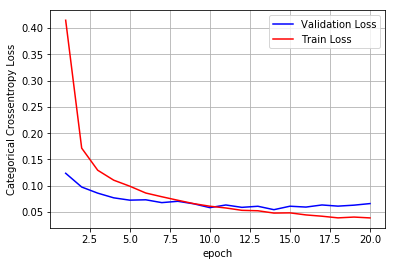

In [23]:
score = model_3_with_dropout3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history333.history['val_loss']
ty = history333.history['loss']
plt_dynamic(x, vy, ty, ax)

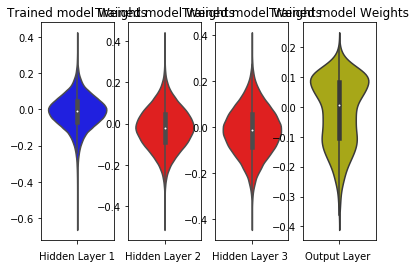

In [24]:
w_after = model_3_with_dropout3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')


plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

with batch normalization and dropout

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model_3_with_dropout_bn = Sequential()
model_3_with_dropout_bn.add(Dense(588, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal()))
model_3_with_dropout_bn.add(BatchNormalization())
model_3_with_dropout_bn.add(Dropout(0.5))


model_3_with_dropout_bn.add(Dense(392, activation='relu', kernel_initializer=he_normal()) )
model_3_with_dropout_bn.add(BatchNormalization())
model_3_with_dropout_bn.add(Dropout(0.5))

model_3_with_dropout_bn.add(Dense(196, activation='relu', kernel_initializer=he_normal()) )
model_3_with_dropout_bn.add(BatchNormalization())
model_3_with_dropout_bn.add(Dropout(0.5))

model_3_with_dropout_bn.add(Dense(output_dim, activation='softmax'))

print(model_3_with_dropout_bn.summary())

model_3_with_dropout_bn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history34 = model_3_with_dropout_bn.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_168 (Dense)            (None, 588)               461580    
_________________________________________________________________
batch_normalization_60 (Batc (None, 588)               2352      
_________________________________________________________________
dropout_60 (Dropout)         (None, 588)               0         
_________________________________________________________________
dense_169 (Dense)            (None, 392)               230888    
_________________________________________________________________
batch_normalization_61 (Batc (None, 392)               1568      
_________________________________________________________________
dropout_61 (Dropout)         (None, 392)               0         
_________________________________________________________________
dense_170 (Dense)            (None, 196)               77028     
__________

Test score: 0.051900947756844104
Test accuracy: 0.9853


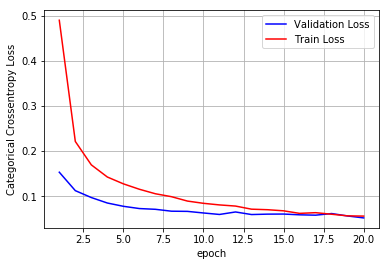

In [0]:
score = model_3_with_dropout_bn.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history34.history['val_loss']
ty = history34.history['loss']
plt_dynamic(x, vy, ty, ax)

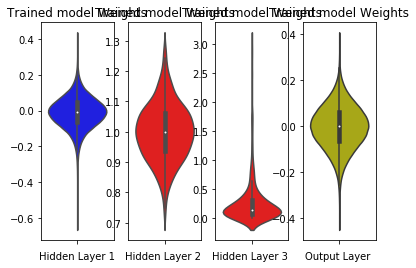

In [0]:
w_after = model_3_with_dropout_bn.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')


plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

MLP WITH FIVE HIDDEN LAYERS 

without dropout and batchnormalization

In [0]:
model_5_without_dropout_bn = Sequential()
model_5_without_dropout_bn.add(Dense(588, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal()))
model_5_without_dropout_bn.add(Dense(392, activation='relu', kernel_initializer=he_normal()) )
model_5_without_dropout_bn.add(Dense(196, activation='relu', kernel_initializer=he_normal()) )
model_5_without_dropout_bn.add(Dense(84, activation='relu', kernel_initializer=he_normal()) )
model_5_without_dropout_bn.add(Dense(42, activation='relu', kernel_initializer=he_normal()) )
model_5_without_dropout_bn.add(Dense(output_dim, activation='softmax'))

print(model_5_without_dropout_bn.summary())

model_5_without_dropout_bn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history51 = model_5_without_dropout_bn.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_172 (Dense)            (None, 588)               461580    
_________________________________________________________________
dense_173 (Dense)            (None, 392)               230888    
_________________________________________________________________
dense_174 (Dense)            (None, 196)               77028     
_________________________________________________________________
dense_175 (Dense)            (None, 84)                16548     
_________________________________________________________________
dense_176 (Dense)            (None, 42)                3570      
_________________________________________________________________
dense_177 (Dense)            (None, 10)                430       
Total params: 790,044
Trainable params: 790,044
Non-trainable params: 0
_________________________________________________________________
None

Test score: 0.08511665445353392
Test accuracy: 0.9815


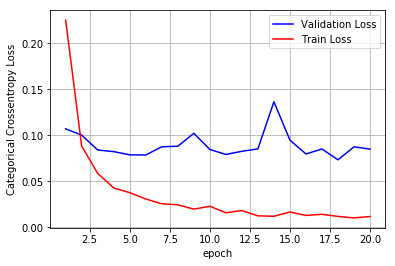

In [0]:
score = model_5_without_dropout_bn.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history51.history['val_loss']
ty = history51.history['loss']
plt_dynamic(x, vy, ty, ax)

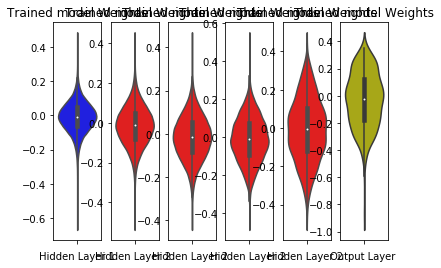

In [0]:
w_after = model_5_without_dropout_bn.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)

out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')



plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')


plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')


plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='r')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

with batch normalization

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model_5_with_bn = Sequential()
model_5_with_bn.add(Dense(588, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal()))
model_5_with_bn.add(BatchNormalization())


model_5_with_bn.add(Dense(392, activation='relu', kernel_initializer=he_normal()) )
model_5_with_bn.add(BatchNormalization())


model_5_with_bn.add(Dense(196, activation='relu', kernel_initializer=he_normal()) )
model_5_with_bn.add(BatchNormalization())


model_5_with_bn.add(Dense(84, activation='relu', kernel_initializer=he_normal()) )
model_5_with_bn.add(BatchNormalization())


model_5_with_bn.add(Dense(42, activation='relu', kernel_initializer=he_normal()) )
model_5_with_bn.add(BatchNormalization())


model_5_with_bn.add(Dense(output_dim, activation='softmax'))

print(model_5_with_bn.summary())

model_5_with_bn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history52 = model_5_with_bn.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_178 (Dense)            (None, 588)               461580    
_________________________________________________________________
batch_normalization_63 (Batc (None, 588)               2352      
_________________________________________________________________
dense_179 (Dense)            (None, 392)               230888    
_________________________________________________________________
batch_normalization_64 (Batc (None, 392)               1568      
_________________________________________________________________
dense_180 (Dense)            (None, 196)               77028     
_________________________________________________________________
batch_normalization_65 (Batc (None, 196)               784       
_________________________________________________________________
dense_181 (Dense)            (None, 84)                16548     
__________

Test score: 0.07355571802903141
Test accuracy: 0.9831


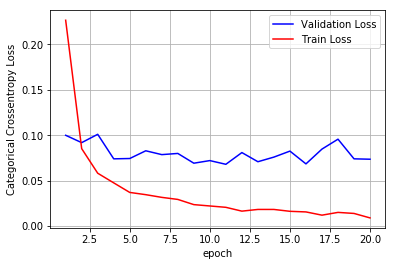

In [0]:
score = model_5_with_bn.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history52.history['val_loss']
ty = history52.history['loss']
plt_dynamic(x, vy, ty, ax)

Text(0.5, 0, 'Output Layer ')

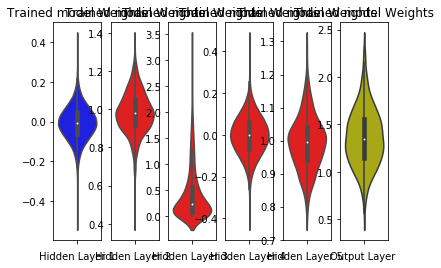

In [0]:
w_after = model_5_with_bn.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)

out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')



plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')


plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')


plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='r')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')


with  dropout(dropout rate 0.5)

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model_5_with_dropout = Sequential()
model_5_with_dropout.add(Dense(588, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal()))
model_5_with_dropout.add(Dropout(0.5))

model_5_with_dropout.add(Dense(392, activation='relu', kernel_initializer=he_normal()) )
model_5_with_dropout.add(Dropout(0.5))

model_5_with_dropout.add(Dense(196, activation='relu', kernel_initializer=he_normal()) )
model_5_with_dropout.add(Dropout(0.5))

model_5_with_dropout.add(Dense(84, activation='relu', kernel_initializer=he_normal()) )
model_5_with_dropout.add(Dropout(0.5))

model_5_with_dropout.add(Dense(42, activation='relu', kernel_initializer=he_normal()) )
model_5_with_dropout.add(Dropout(0.5))

model_5_with_dropout.add(Dense(output_dim, activation='softmax'))

print(model_5_with_dropout.summary())

model_5_with_dropout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history53 = model_5_with_dropout.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_184 (Dense)            (None, 588)               461580    
_________________________________________________________________
dropout_63 (Dropout)         (None, 588)               0         
_________________________________________________________________
dense_185 (Dense)            (None, 392)               230888    
_________________________________________________________________
dropout_64 (Dropout)         (None, 392)               0         
_________________________________________________________________
dense_186 (Dense)            (None, 196)               77028     
_________________________________________________________________
dropout_65 (Dropout)         (None, 196)               0         
_________________________________________________________________
dense_187 (Dense)            (None, 84)                16548     
__________

Test score: 0.12453353681968292
Test accuracy: 0.9764


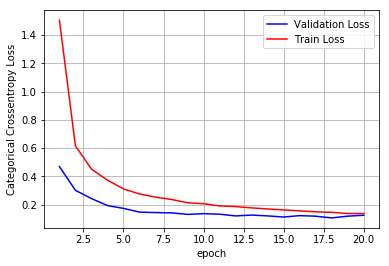

In [0]:
score = model_5_with_dropout.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history53.history['val_loss']
ty = history53.history['loss']
plt_dynamic(x, vy, ty, ax)

Text(0.5, 0, 'Output Layer ')

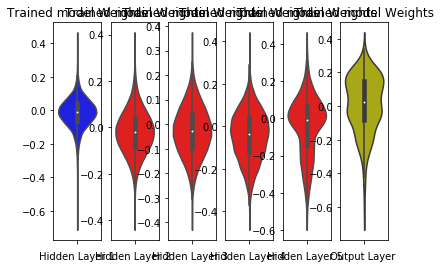

In [0]:
w_after = model_5_with_dropout.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)

out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')



plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')


plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')


plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='r')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')

with  dropout(dropout rate 0.6)

In [27]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model_5_with_dropout2 = Sequential()
model_5_with_dropout2.add(Dense(588, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal()))
model_5_with_dropout2.add(Dropout(0.6))

model_5_with_dropout2.add(Dense(392, activation='relu', kernel_initializer=he_normal()) )
model_5_with_dropout2.add(Dropout(0.6))

model_5_with_dropout2.add(Dense(196, activation='relu', kernel_initializer=he_normal()) )
model_5_with_dropout2.add(Dropout(0.6))

model_5_with_dropout2.add(Dense(84, activation='relu', kernel_initializer=he_normal()) )
model_5_with_dropout2.add(Dropout(0.6))

model_5_with_dropout2.add(Dense(42, activation='relu', kernel_initializer=he_normal()) )
model_5_with_dropout2.add(Dropout(0.6))

model_5_with_dropout2.add(Dense(output_dim, activation='softmax'))

print(model_5_with_dropout2.summary())

model_5_with_dropout2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history532 = model_5_with_dropout2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 588)               461580    
_________________________________________________________________
dropout_24 (Dropout)         (None, 588)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 392)               230888    
_________________________________________________________________
dropout_25 (Dropout)         (None, 392)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 196)               77028     
_________________________________________________________________
dropout_26 (Dropout)         (None, 196)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 84)                16548     
__________

Test score: 0.17873552452921868
Test accuracy: 0.9652


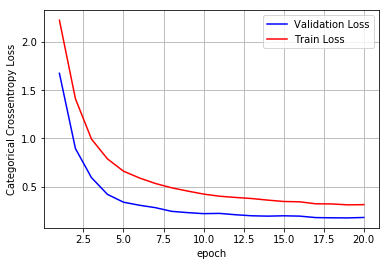

In [28]:
score = model_5_with_dropout2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history532.history['val_loss']
ty = history532.history['loss']
plt_dynamic(x, vy, ty, ax)

Text(0.5, 0, 'Output Layer ')

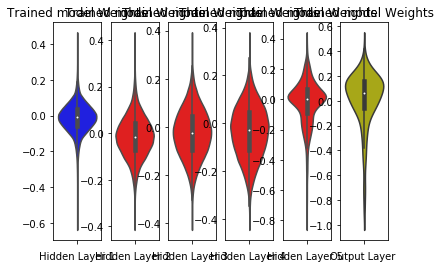

In [29]:
w_after = model_5_with_dropout2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)

out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')



plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')


plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')


plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='r')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')


with  dropout(dropout rate 0.4)

In [30]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model_5_with_dropout3 = Sequential()
model_5_with_dropout3.add(Dense(588, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal()))
model_5_with_dropout3.add(Dropout(0.4))

model_5_with_dropout3.add(Dense(392, activation='relu', kernel_initializer=he_normal()) )
model_5_with_dropout3.add(Dropout(0.4))

model_5_with_dropout3.add(Dense(196, activation='relu', kernel_initializer=he_normal()) )
model_5_with_dropout3.add(Dropout(0.4))

model_5_with_dropout3.add(Dense(84, activation='relu', kernel_initializer=he_normal()) )
model_5_with_dropout3.add(Dropout(0.4))

model_5_with_dropout3.add(Dense(42, activation='relu', kernel_initializer=he_normal()) )
model_5_with_dropout3.add(Dropout(0.4))

model_5_with_dropout3.add(Dense(output_dim, activation='softmax'))

print(model_5_with_dropout3.summary())

model_5_with_dropout3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history533 = model_5_with_dropout3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 588)               461580    
_________________________________________________________________
dropout_29 (Dropout)         (None, 588)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 392)               230888    
_________________________________________________________________
dropout_30 (Dropout)         (None, 392)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 196)               77028     
_________________________________________________________________
dropout_31 (Dropout)         (None, 196)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 84)                16548     
__________

Test score: 0.09405851370073814
Test accuracy: 0.9812


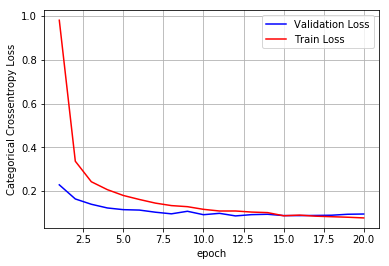

In [31]:
score = model_5_with_dropout3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history533.history['val_loss']
ty = history533.history['loss']
plt_dynamic(x, vy, ty, ax)

Text(0.5, 0, 'Output Layer ')

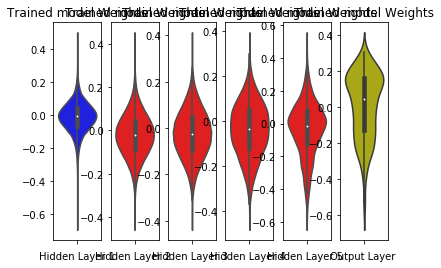

In [32]:
w_after = model_5_with_dropout3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)

out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')



plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')


plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')


plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='r')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')


with batch normalization and dropout(dropout  rate 0.4)

In [33]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model_5_with_dropout_bn = Sequential()
model_5_with_dropout_bn.add(Dense(588, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal()))
model_5_with_dropout_bn.add(BatchNormalization())
model_5_with_dropout_bn.add(Dropout(0.4))

model_5_with_dropout_bn.add(Dense(392, activation='relu', kernel_initializer=he_normal()) )
model_5_with_dropout_bn.add(BatchNormalization())
model_5_with_dropout_bn.add(Dropout(0.4))

model_5_with_dropout_bn.add(Dense(196, activation='relu', kernel_initializer=he_normal()) )
model_5_with_dropout_bn.add(BatchNormalization())
model_5_with_dropout_bn.add(Dropout(0.4))

model_5_with_dropout_bn.add(Dense(84, activation='relu', kernel_initializer=he_normal()) )
model_5_with_dropout_bn.add(BatchNormalization())
model_5_with_dropout_bn.add(Dropout(0.4))

model_5_with_dropout_bn.add(Dense(42, activation='relu', kernel_initializer=he_normal()) )
model_5_with_dropout_bn.add(BatchNormalization())
model_5_with_dropout_bn.add(Dropout(0.4))

model_5_with_dropout_bn.add(Dense(output_dim, activation='softmax'))

print(model_5_with_dropout_bn.summary())

model_5_with_dropout_bn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history54 = model_5_with_dropout_bn.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 588)               461580    
_________________________________________________________________
batch_normalization_1 (Batch (None, 588)               2352      
_________________________________________________________________
dropout_34 (Dropout)         (None, 588)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 392)               230888    
_________________________________________________________________
batch_normalization_2 (Batch (None, 392)               1568      
_________________________________________________________________
dropout_35 (Dropout)         (None, 392)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 196)               77028     
__________

Test score: 0.06840091203844641
Test accuracy: 0.9831


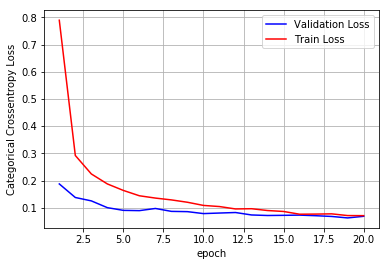

In [34]:
score = model_5_with_dropout_bn.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history54.history['val_loss']
ty = history54.history['loss']
plt_dynamic(x, vy, ty, ax)

Text(0.5, 0, 'Output Layer ')

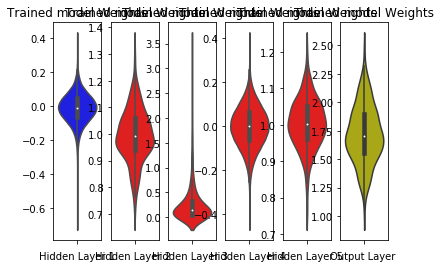

In [36]:
w_after = model_5_with_dropout_bn.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)

out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')



plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')


plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')


plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='r')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')

In [37]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["MLP","Type", "Train_accuracy", "Test_accuracy","Train_loss" ,"Test_loss"]

x.add_row(["784-392-196-10","Without_bn_dropout" ,0.9985,0.9767,0.0043,0.1190])
x.add_row(["784-392-196-10","With_bn" ,0.9978,0.9815,0.0060,0.0853])
x.add_row(["784-392-196-10","With_dropout(0.5)" ,0.9833,0.9822,0.0530,0.0635])
x.add_row(["784-392-196-10","With_dropout(0.6)" ,0.9746,0.9821,0.0850,0.0666])
x.add_row(["784-392-196-10","With_dropout(0.4)" ,0.9888,0.9826,0.0351,0.0649])
x.add_row(["784-392-196-10","With_bn_dropout(0.5)" ,0.9807,0.9829,0.0587,0.0585])

print(x)

+----------------+----------------------+----------------+---------------+------------+-----------+
|      MLP       |         Type         | Train_accuracy | Test_accuracy | Train_loss | Test_loss |
+----------------+----------------------+----------------+---------------+------------+-----------+
| 784-392-196-10 |  Without_bn_dropout  |     0.9985     |     0.9767    |   0.0043   |   0.119   |
| 784-392-196-10 |       With_bn        |     0.9978     |     0.9815    |   0.006    |   0.0853  |
| 784-392-196-10 |  With_dropout(0.5)   |     0.9833     |     0.9822    |   0.053    |   0.0635  |
| 784-392-196-10 |  With_dropout(0.6)   |     0.9746     |     0.9821    |   0.085    |   0.0666  |
| 784-392-196-10 |  With_dropout(0.4)   |     0.9888     |     0.9826    |   0.0351   |   0.0649  |
| 784-392-196-10 | With_bn_dropout(0.5) |     0.9807     |     0.9829    |   0.0587   |   0.0585  |
+----------------+----------------------+----------------+---------------+------------+-----------+


In [38]:
y = PrettyTable()

y.field_names = ["MLP","Type", "Train_accuracy", "Test_accuracy","Train_loss" ,"Test_loss"]

y.add_row(["784-588-392-196-10","Without_bn_dropout" ,0.9978,0.9812,0.0080,0.0883])
y.add_row(["784-588-392-196-10","With_bn" ,0.9968,0.9813,0.0100,0.0777])
y.add_row(["784-588-392-196-10","With_dropout(0.5)" ,0.9827,0.9823,0.0586,0.0711])
y.add_row(["784-588-392-196-10","With_dropout(0.6)" ,0.9750,0.9812,0.0927,0.0689])
y.add_row(["784-588-392-196-10","With_dropout(0.4)" ,0.9877,0.9843,0.0389,0.0611])
y.add_row(["784-588-392-196-10","With_bn_dropout(0.5)" ,0.9826,0.9853,0.0559,0.0519])

print(y)

+--------------------+----------------------+----------------+---------------+------------+-----------+
|        MLP         |         Type         | Train_accuracy | Test_accuracy | Train_loss | Test_loss |
+--------------------+----------------------+----------------+---------------+------------+-----------+
| 784-588-392-196-10 |  Without_bn_dropout  |     0.9978     |     0.9812    |   0.008    |   0.0883  |
| 784-588-392-196-10 |       With_bn        |     0.9968     |     0.9813    |    0.01    |   0.0777  |
| 784-588-392-196-10 |  With_dropout(0.5)   |     0.9827     |     0.9823    |   0.0586   |   0.0711  |
| 784-588-392-196-10 |  With_dropout(0.6)   |     0.975      |     0.9812    |   0.0927   |   0.0689  |
| 784-588-392-196-10 |  With_dropout(0.4)   |     0.9877     |     0.9843    |   0.0389   |   0.0611  |
| 784-588-392-196-10 | With_bn_dropout(0.5) |     0.9826     |     0.9853    |   0.0559   |   0.0519  |
+--------------------+----------------------+----------------+--

In [39]:
z = PrettyTable()

z.field_names = ["MLP","Type", "Train_accuracy", "Test_accuracy","Train_loss" ,"Test_loss"]

z.add_row(["784-588-392-196-84-42-10","Without_bn_dropout" ,0.9964,0.9815,0.00119,0.0851])
z.add_row(["784-588-392-196-84-42-10","With_bn" ,0.9974,0.9831,0.0089,0.0736])
z.add_row(["784-588-392-196-84-42-10","With_dropout(0.5)" ,0.9681,0.9764,0.1363,0.1245])
z.add_row(["784-588-392-196-84-42-10","With_dropout(0.6)" ,0.9273,0.9652,0.3121,0.1787])
z.add_row(["784-588-392-196-84-42-10","With_dropout(0.4)" ,0.9820,0.9812,0.0762,0.0941])
z.add_row(["784-588-392-196-84-42-10","With_bn_dropout(0.4)" ,0.9812,0.9831,0.0708,0.0684])

print(z)

+--------------------------+----------------------+----------------+---------------+------------+-----------+
|           MLP            |         Type         | Train_accuracy | Test_accuracy | Train_loss | Test_loss |
+--------------------------+----------------------+----------------+---------------+------------+-----------+
| 784-588-392-196-84-42-10 |  Without_bn_dropout  |     0.9964     |     0.9815    |  0.00119   |   0.0851  |
| 784-588-392-196-84-42-10 |       With_bn        |     0.9974     |     0.9831    |   0.0089   |   0.0736  |
| 784-588-392-196-84-42-10 |  With_dropout(0.5)   |     0.9681     |     0.9764    |   0.1363   |   0.1245  |
| 784-588-392-196-84-42-10 |  With_dropout(0.6)   |     0.9273     |     0.9652    |   0.3121   |   0.1787  |
| 784-588-392-196-84-42-10 |  With_dropout(0.4)   |     0.982      |     0.9812    |   0.0762   |   0.0941  |
| 784-588-392-196-84-42-10 | With_bn_dropout(0.4) |     0.9812     |     0.9831    |   0.0708   |   0.0684  |
+---------

**Conclusions**




  Tried 3 different MLP arcitures on MNIST dataset

  1. All models are giving best results except the models without dropouts are slightly overfit to the traindata.

  2. Models with Dropout are giving good performance.
  
      3.I tried different dropout rates with each architecture,for 2 layered and 3 layered dropout rate 0.5 is giving best results.for 5 layered architecture dropout rate 0.4 is best performance.

  4. weight distributions for some hidden layers are changed to mean=1 for batch normalized models.

  5. As hidden layers are increasing even with the dropouts also the performance of the model is decreasing.

  6.  Represented the  all three architectures results using prettytable library.